In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import *
#from sklearn.models import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
# rcParams['figure.figsize'] = 12, 8


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_absolute_percentage_error as mape 
from sklearn.metrics import r2_score as r2 
from sklearn.metrics import explained_variance_score as evs 

In [5]:
def rmse(y_pred, y_true):
    return np.sqrt(mse(y_pred, y_true))

In [6]:
def CC(y_pred, y_true):
    return np.corrcoef(y_pred, y_true)[0][1]

In [7]:
import pickle

#### May Dataset

In [8]:
df = pd.read_csv('inputs/DS2_1448.csv')

In [9]:
from processing import create_features, split_data

In [10]:
train_len = int(.6*df.shape[0])
train_data, val_data, test_data = split_data(df.wind_speed.values, train_len)

In [11]:
from lssvm import LSSVMRegression as LSSVM

In [12]:
def get_data(file_name):
    file = open(file_name, 'rb')
    data = pickle.load(file)
    file.close()
    return data

#### Get Predicted Values

##### SVMD-LSSVM-EBQPSO Model

In [22]:
svmd_ebqpso_2 = get_data('svmd_ebqpso_2')

In [23]:
error_values = get_data('error_svmd_eb_lssvm_2')

In [24]:
test_preds = []

In [25]:
svmds = pd.read_csv('inputs/SVMD_2.csv')

In [26]:
for i in range(len(svmd_ebqpso_2)):
    params = svmd_ebqpso_2[i][0]
    train_data_i, _, test_data_i = split_data(svmds.iloc[:, i].values, train_len)
    x_train_i, y_train_i = create_features(train_data_i, params[-1])
    x_test_i, y_test_i = create_features(test_data_i, params[-1])
    reg = LSSVM(gamma=params[0], sigma=params[1])
    reg.fit(x_train_i, y_train_i)
    test_preds.append(reg.predict(x_test_i))

In [27]:
# Get the optimum values of window sizes for each modes
window_sizes = np.array([svmd_ebqpso_2[i][0][-1] for i in svmd_ebqpso_2.keys()])

In [28]:
max_window_size = np.max(window_sizes)

In [29]:
max_window_size

13

In [30]:
adjusted_test_preds = np.array([
    list(test_preds[i][(max_window_size-window_sizes[i]):]) for i in range(len(window_sizes))
])

In [31]:
total_modes_preds = adjusted_test_preds.sum(axis=0)

In [32]:
total_modes_preds.shape

(285,)

In [33]:
error_values_2 = error_values[max_window_size-5:]

In [34]:
svmd_ebqpso_lssvm_preds = total_modes_preds + error_values_2

In [35]:
svmd_ebqpso_lssvm_preds.shape

(285,)

In [36]:
_, y_test = create_features(test_data, max_window_size)

In [37]:
mae(y_test, svmd_ebqpso_lssvm_preds)

0.6612762034699307

In [38]:
lssvm_ebqpso_preds_2 = lssvm_ebqpso_preds_2[max_window_size-1:]

##### LSSVM-EBQPSO Model

In [78]:
lssvm_ebqpso_2 = get_data('lssvm_ebqpso_2')

In [79]:
params = lssvm_ebqpso_2['params']
train_data_, _, test_data_ = split_data(df.wind_speed.values, train_len)
x_train_, y_train_ = create_features(train_data_, int(params[-1]))
x_test_, y_test_ = create_features(test_data_, int(params[-1]))
reg = LSSVM(gamma=params[0], sigma=params[1])
reg.fit(x_train_, y_train_)
lssvm_ebqpso_preds_2 = reg.predict(x_test_)

In [80]:
lseb_window_size = int(lssvm_ebqpso_2['params'][-1])
lssvm_ebqpso_preds_2 = lssvm_ebqpso_preds_2[max_window_size-lseb_window_size:]

In [81]:
len(lssvm_ebqpso_preds_2)

285

##### CNN Model

In [39]:
cnn_preds = get_data('pred_cnn_2')

In [40]:
len(cnn_preds)

293

In [41]:
cnn_preds_2 = cnn_preds[max_window_size-5:]

In [42]:
len(cnn_preds_2)

285

In [43]:
mse(y_test, cnn_preds_2)

1.1323038786615298

##### SVMD-CNN Model

In [44]:
svmd_cnn_2 = get_data('svmd_cnn_2')

In [45]:
svmd_cnn_2 = svmd_cnn_2[max_window_size-5:]

In [46]:
len(svmd_cnn_2)

285

In [47]:
mse(svmd_cnn_2, y_test)

0.7692740034496406

##### LSTM Model

In [48]:
lstm_preds_2 = get_data('lstm_2')

In [49]:
lstm_preds_2 = lstm_preds_2[max_window_size-5:]

In [50]:
len(lstm_preds_2)

285

In [51]:
mse(lstm_preds_2, y_test)

1.1347966007451304

##### SVMD-LSTM Model

In [52]:
svmd_lstm_2 = get_data('svmd_lstm_2')

In [53]:
svmd_lstm_2 = svmd_lstm_2[max_window_size-5:]

In [54]:
len(svmd_lstm_2)

285

In [55]:
mse(svmd_lstm_2, y_test)

0.7334250877898173

##### CNN-LSTM Model

In [56]:
cnn_lstm_2 = get_data('cnn_lstm_2')

In [57]:
cnn_lstm_2 = cnn_lstm_2[max_window_size-5:]

In [58]:
len(cnn_lstm_2)

285

In [59]:
mse(cnn_lstm_2, y_test)

1.130131827283289

##### SVMD-CNN-LSTM Model

In [60]:
svmd_cnn_lstm_2 = get_data('svmd_cnnlstm_2')

In [62]:
svmd_cnn_lstm_2 = svmd_cnn_lstm_2[max_window_size-5:]

In [63]:
len(svmd_cnn_lstm_2)

285

In [64]:
mse(svmd_cnn_lstm_2, y_test)

0.8088622010953985

In [83]:
models = ['LSSVM-EBQPSO', 'Proposed', 'CNN', 'SVMD-CNN', 'LSTM', 'SVMD-LSTM', 'CNN-LSTM', 'SVMD-CNN-LSTM']
predicted_values = [
    lssvm_ebqpso_preds_2,
    svmd_ebqpso_lssvm_preds, 
    cnn_preds_2, 
    svmd_cnn_2, 
    lstm_preds_2, 
    svmd_lstm_2, 
    cnn_lstm_2,
    svmd_cnn_lstm_2 
]

In [84]:
def summarize_results(models, predicted_values):
    print("Model".rjust(25), "\t RMSE \t MAE \t MAPE \t R2 \t  CC \t EVS")
    print("---------".rjust(25), "\t ---- \t ---- \t ---- \t ---- \t ---- \t ----")
    for i in range(len(models)):
        print(
            models[i].rjust(25), '\t', 
            round(rmse(y_test, predicted_values[i]), 3), '\t', 
            round(mae(y_test, predicted_values[i]), 3),  '\t',
            round(mape(y_test, predicted_values[i]), 3), '\t',
            round(r2(y_test, predicted_values[i]), 3),   '\t',
            round(CC(y_test, predicted_values[i]), 3),  '\t',
            round(evs(y_test, predicted_values[i]), 3),  '\t'
        )

In [85]:
summarize_results(models, predicted_values)

                    Model 	 RMSE 	 MAE 	 MAPE 	 R2 	  CC 	 EVS
                --------- 	 ---- 	 ---- 	 ---- 	 ---- 	 ---- 	 ----
             LSSVM-EBQPSO 	 1.127 	 0.877 	 0.167 	 0.683 	 0.829 	 0.683 	
                 Proposed 	 0.856 	 0.661 	 0.13 	 0.817 	 0.905 	 0.817 	
                      CNN 	 1.064 	 0.819 	 0.16 	 0.717 	 0.847 	 0.717 	
                 SVMD-CNN 	 0.877 	 0.669 	 0.134 	 0.808 	 0.901 	 0.811 	
                     LSTM 	 1.065 	 0.816 	 0.157 	 0.717 	 0.847 	 0.717 	
                SVMD-LSTM 	 0.856 	 0.658 	 0.131 	 0.817 	 0.906 	 0.818 	
                 CNN-LSTM 	 1.063 	 0.825 	 0.16 	 0.718 	 0.847 	 0.718 	
            SVMD-CNN-LSTM 	 0.899 	 0.689 	 0.138 	 0.798 	 0.896 	 0.802 	


In [86]:
colors = ['#18a1cd', '#009076', '#fa8c00', '#857622', '#a65628', '#c24c39', '#5c5a30', '#4daf4a']

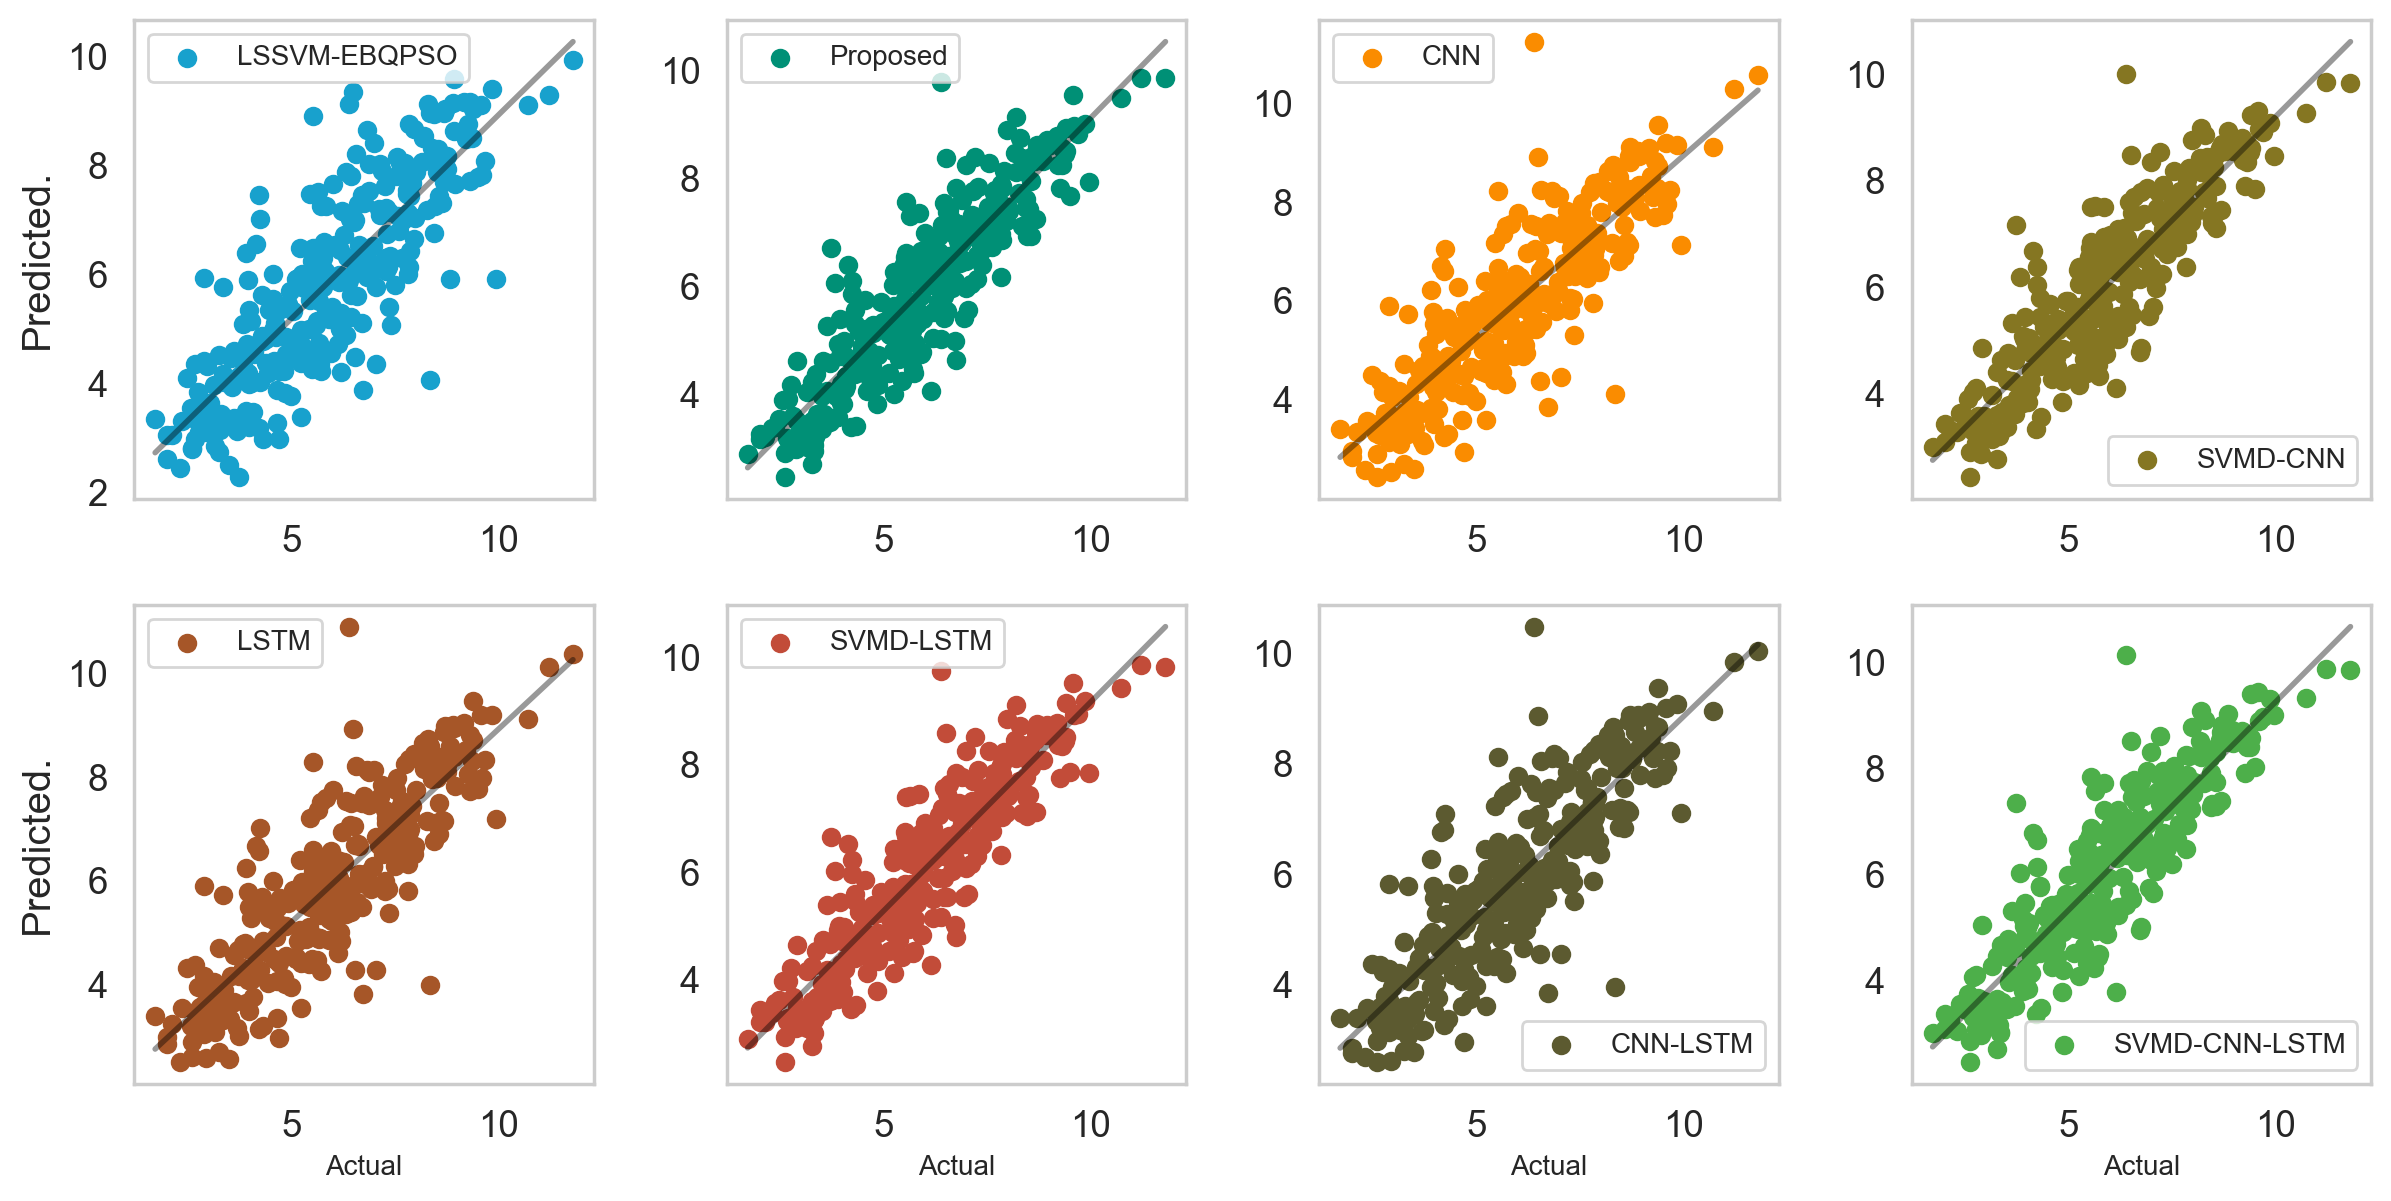

In [88]:
plt.rcParams["font.size"] = 10
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(12, 6))
plt.subplots_adjust(left=None, bottom=.1, right=None, top=.9, wspace=.2, hspace=.2)
# fig.delaxes(axes[-1][-1])
fig.tight_layout()
# fig.delaxes(axes[-1][-2])

for i in range(len(models)):
    row = i // 4
    col = i % 4
    axes[row][col].scatter(y_test, predicted_values[i], color = colors[i], label=models[i])
    
    m, b = np.polyfit(y_test, predicted_values[i], deg=1)

    # Create sequence of 100 numbers from 0 to 100 
    xseq = np.linspace(min(y_test), max(y_test), num=len(y_test))

    # Plot regression line
    axes[row][col].plot(xseq, b + m * xseq, color="black", lw=2, alpha=.4)

    # axes[row][col].set_title(models[i], fontsize=10)
    if i > 3:
        axes[row][col].set_xlabel('Actual', fontsize=10)
    

    axes[row][col].grid(False)
    if col == 0:
        plt.setp(axes[row, 0], ylabel='Predicted.')
    if row == -1:
        plt.setp(axes[-1, col], xlabel='Actual')
    axes[row][col].legend(fontsize=10)
# plt.axis('equal')
plt.savefig('figures/ds2_linear_fit.png', dpi=300)

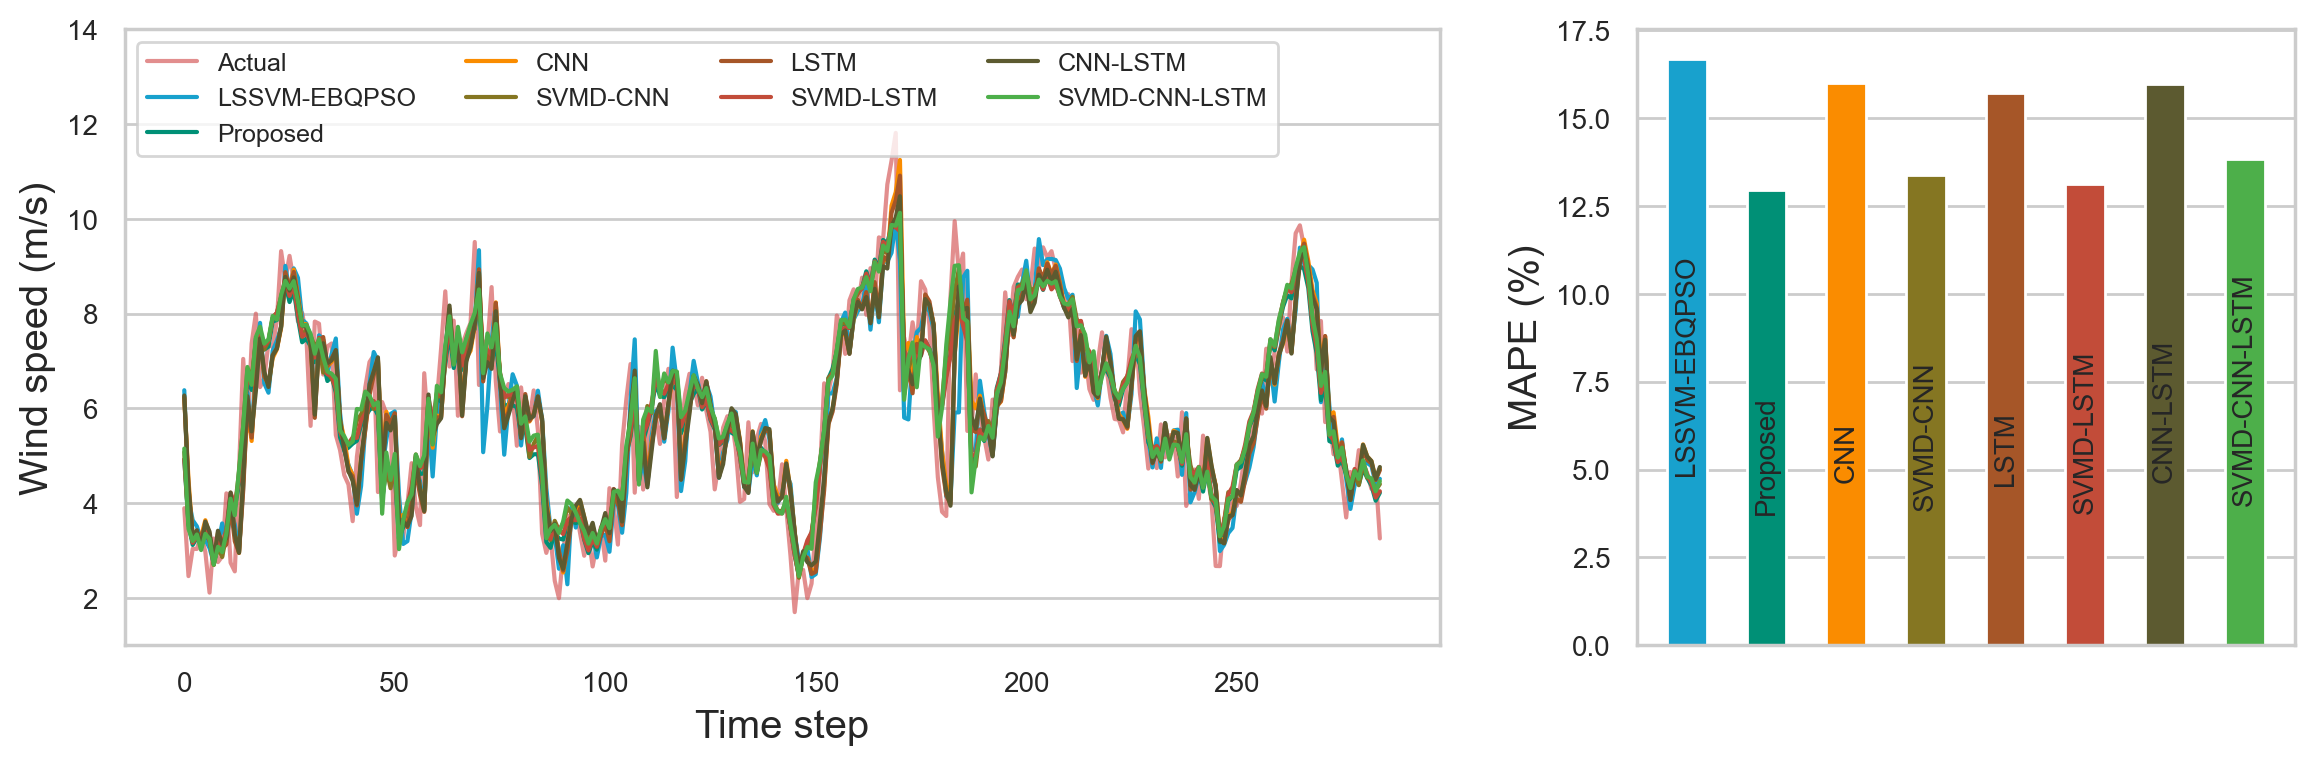

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), gridspec_kw={'width_ratios': [4, 2]})

for a in ax:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
	    label.set_fontsize(10)
        
ax[0].plot(range(len(y_test)), y_test, color='r', alpha = .7, label='Actual')
for i, data in enumerate(predicted_values):
    ax[0].plot(range(len(y_test)), data, color=colors[i], label = models[i])
    

ax[0].grid(axis='x')
ax[0].legend(ncol=4, loc='upper left', fontsize=9)
ax[0].set_xlabel('Time step')
ax[0].set_ylim([1, 14])
ax[0].set_ylabel('Wind speed (m/s)')

ax[1].bar(range(len(models)), [mape(y_test, data)*100 for data in predicted_values], color=colors, width=.5)
ax[1].set_ylabel('MAPE (%)')
ax[1].xaxis.set_visible(False)
ax[1].grid(axis='x')
for i in range(len(models)):
    ax[1].text(i, (mape(y_test, predicted_values[i])*30), models[i], ha='center', rotation=90, fontsize=10)
plt.savefig('figures/ds2_forecast_figs.png', dpi=300)


In [91]:
import matplotlib as mpl
from scipy.stats import norm


def plot_error_hist(errors, colrs, d=100):
    bins=25
    fig, axs = plt.subplots(2, 4, figsize=(12, 6), dpi=d)
    fig.tight_layout()
    mpl.rcParams['xtick.labelsize'] = 10 
    mpl.rcParams['ytick.labelsize'] = 10 
    
    # fig.delaxes(axs[-1][-1])
    # fig.delaxes(axs[-1][-2])
    
    # for ax in axs:
    #     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	#         label.set_fontsize(10)
        
    for i in range(len(models)):
        mu, std = norm.fit(errors[i])

        # for j in range(2):
        row = i // 4
        col = i % 4
        axs[row][col].hist(errors[i], bins=bins, density = True, color=colrs[i], label=models[i])
        # axs[row][col].legend()
        xmin, xmax = axs[row][col].get_xlim()
        x = np.linspace(xmin, xmax, len(errors[i]))
        p = norm.pdf(x, mu, std)
        axs[row][col].plot(x, p, 'k', linestyle = 'dashed', linewidth=2, alpha=.6)

        axs[row][col].legend(loc='upper left', fontsize=10)

        if col == 0:
            plt.setp(axs[row, 0], ylabel='Freq.')
        if row == -1:
            plt.setp(axs[-1, col], xlabel='Prediction error')
        if col == 0:
            axs[row][col].set_ylabel("Frequency", fontsize=10)
        if row == 1:
            axs[row][col].set_xlabel("Error", fontsize=10)
        # axs[row][col].set_xlabel("Prediction error ("+models[i]+')', fontsize=10)
    
    plt.savefig('figures/ds2_errordist', dpi=d)

In [92]:
errors = [y_test-predicted_values[i] for i in range(len(predicted_values))]

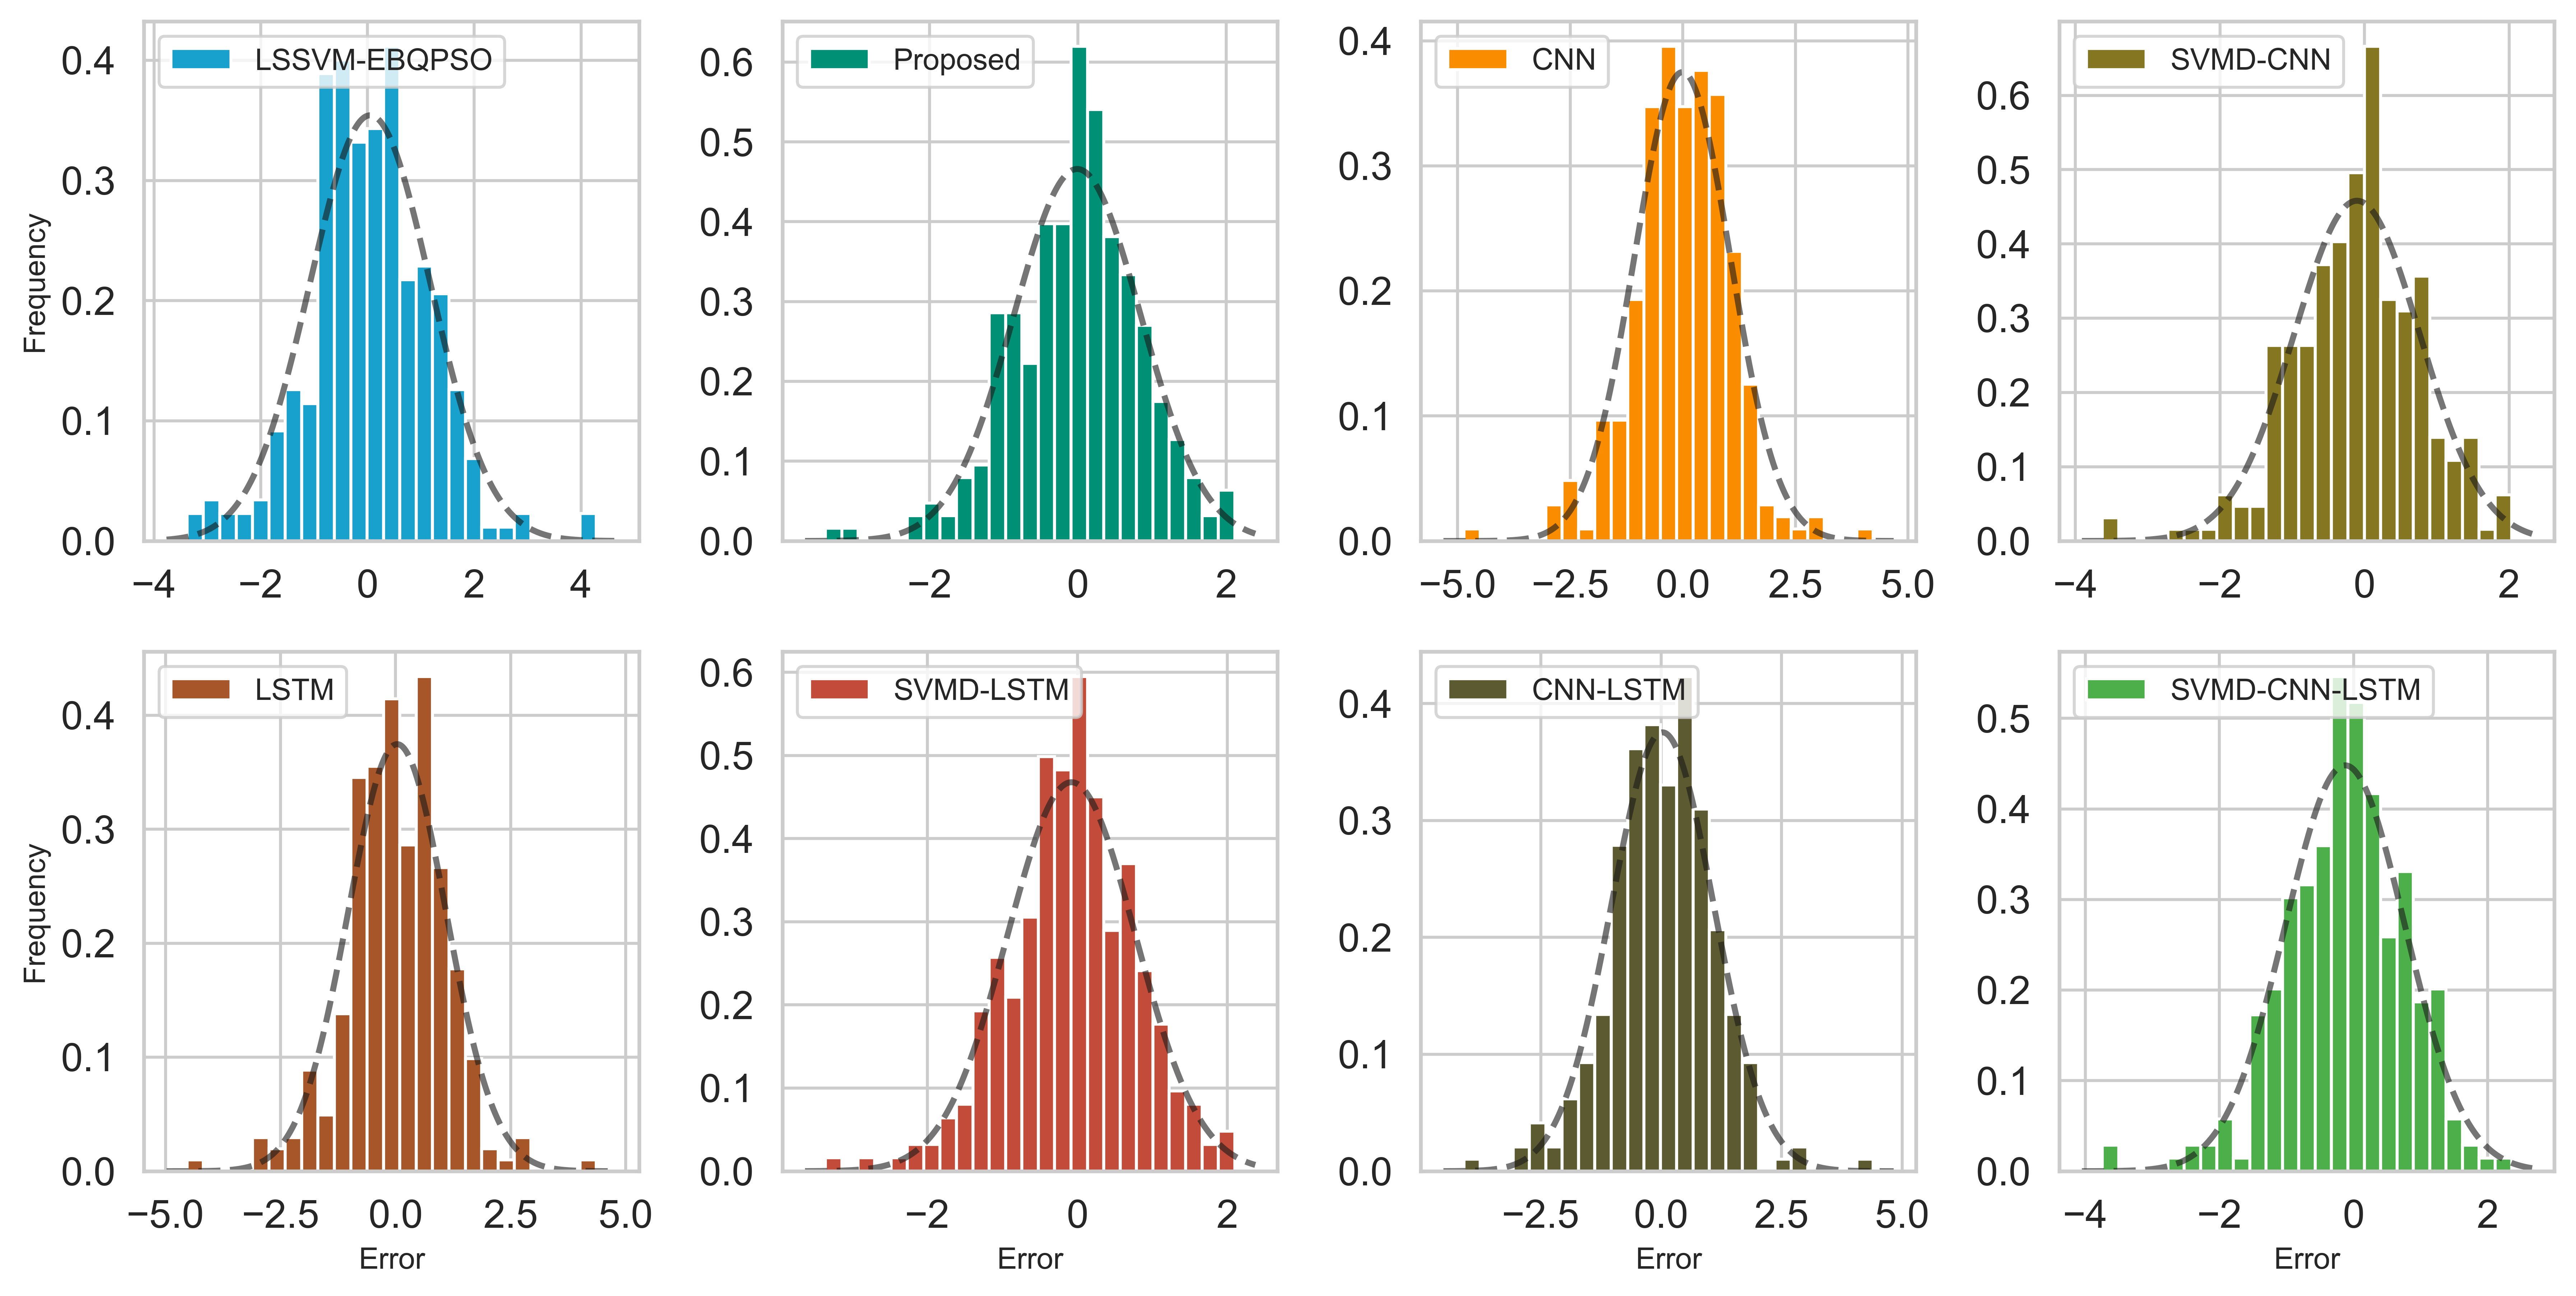

In [93]:
plot_error_hist(errors, colors, d=300)

In [94]:
file = open('ds2_all_errors', 'ab')
pickle.dump(errors, file)
file.close()

In [95]:
errors_dict = {}
for i, error in enumerate(errors):
    errors_dict[models[i]] = error

In [96]:
df_errors = pd.DataFrame(errors_dict)

In [97]:
df_errors

,LSSVM-EBQPSO,Proposed,CNN,SVMD-CNN,LSTM,SVMD-LSTM,CNN-LSTM,SVMD-CNN-LSTM
0,-2.489693,-1.030554,-2.323432,-1.186357,-2.351092,-1.033832,-2.379022,-1.258340
1,-1.630072,-1.086856,-2.035922,-1.100182,-1.848156,-1.157139,-1.900268,-0.997886
2,-0.602421,-0.081307,-0.239683,-0.156935,-0.289685,-0.125721,-0.248374,-0.165299
3,-0.476234,-0.237387,-0.345514,-0.236717,-0.322661,-0.264119,-0.394315,-0.305424
4,0.128013,0.140377,0.038074,0.096075,0.018382,0.052358,0.266066,0.329484
...,...,...,...,...,...,...,...,...
280,0.006345,0.127703,-0.380809,0.031623,-0.270615,-0.004454,-0.373106,-0.043385
281,-0.219826,0.096822,-0.359520,0.093655,-0.281723,0.028267,-0.354637,0.064146
282,-0.483903,-0.071979,-0.586233,-0.207332,-0.537610,-0.110078,-0.587447,-0.219651
283,0.170589,0.537014,0.072826,0.319778,0.102509,0.471826,0.080647,0.338103


In [106]:
import plotly.express as px
 
df = px.data.tips()
 
fig = px.box(df_errors)
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Residual error",
    font=dict(
        size=10,
        color="Black"
    )
)
fig.write_image('figures/ds2_error_box.svg')
fig.show()